In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

In [2]:
#Importing the training dataset
dataset = pd.read_csv('Dataset_Train.csv')

In [3]:
'''LINEAR REGRESSION'''

'LINEAR REGRESSION'

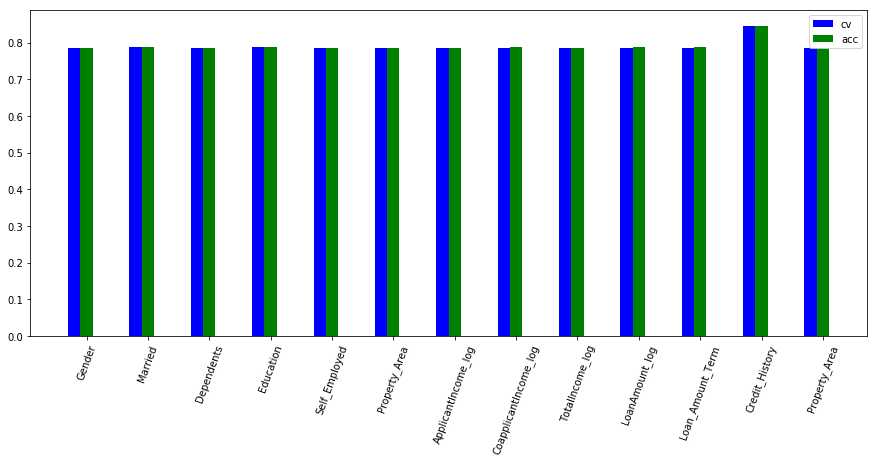

The attribute with the maximum accuracy is  Credit_History


In [9]:
#The Loan Status is the variable we want to predict
outcome = 'Loan_Status'

model = LinearRegression()

variables = ['Gender','Married','Dependents','Education','Self_Employed',
             'Property_Area','ApplicantIncome_log','CoapplicantIncome_log','TotalIncome_log','LoanAmount_log',
             'Loan_Amount_Term','Credit_History','Property_Area']

accuracy_train = []
cross_validation_score = []

for var in variables:
    
    predictors = [var]
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])
    
    accuracy_train.append(1-mean_squared_error(dataset[outcome], predictions))
    
    #Perform k-fold cross-validation with 5 folds

    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    error = []
    CV = []
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        y_pred = (model.predict(dataset[predictors].iloc[test,:]))

        error.append(mean_squared_error(dataset[outcome].iloc[test], y_pred))
        
        CV.append(1-np.mean(error))
    
    cross_validation_score.append(1-np.mean(error))


figure(figsize=(15, 6))
plt.xticks(np.arange(len(variables)),variables,rotation=70)
plt.bar(np.arange(len(variables))-0.2,cross_validation_score, width=0.2, color='b', align='center', label="cv")
plt.bar(np.arange(len(variables)),accuracy_train, width=0.2, color='g', align='center', label="acc")

plt.legend()

plt.savefig("Feature_Selection_linear_1.jpg")
plt.show()

feature = variables[np.argmax(accuracy_train)]
print("The attribute with the maximum accuracy is ",feature)

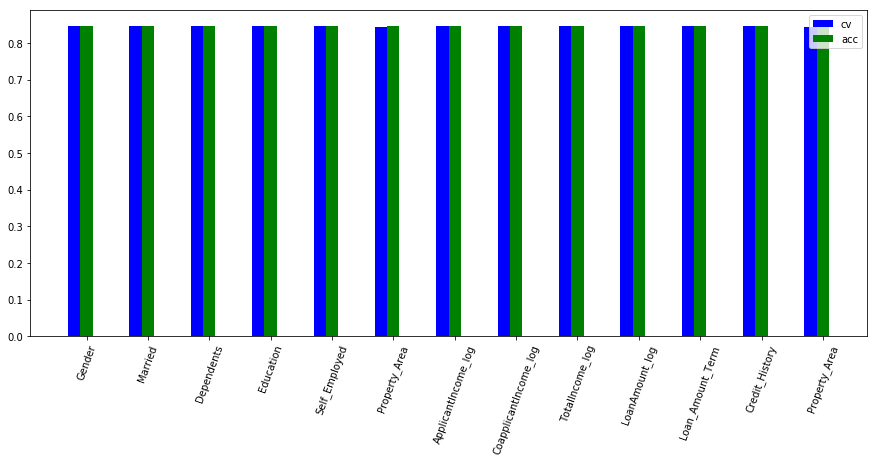

In [7]:
maxi = []
accuracy_train = []
cross_validation_score = []

for var in variables:
    
    predictors = [feature,var]
    
    #Fit the model:
    model.fit(dataset[predictors],dataset[outcome])

    #Make predictions on training set:
    predictions = model.predict(dataset[predictors])

    #accuracy = 1-mean_squared_error(dataset[outcome], predictions)
    
    accuracy_train.append(1-mean_squared_error(dataset[outcome], predictions))
    
    #Perform k-fold cross-validation with 5 folds

    kf = KFold(n_splits=5)
    kf.get_n_splits(dataset)
    
    error = []
    CV = []
    for train, test in kf.split(dataset):
        # Filter training data
        train_predictors = (dataset[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = dataset[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        y_pred = (model.predict(dataset[predictors].iloc[test,:]))

        error.append(mean_squared_error(dataset[outcome].iloc[test], y_pred))
        
        CV.append(1-np.mean(error))
    
    cross_validation_score.append(1-np.mean(error))


figure(figsize=(15, 6))
plt.xticks(np.arange(len(variables)),variables,rotation=70)
plt.bar(np.arange(len(variables))-0.2,cross_validation_score, width=0.2, color='b', align='center', label="cv")
plt.bar(np.arange(len(variables)),accuracy_train, width=0.2, color='g', align='center', label="acc")

plt.legend()

plt.savefig("Feature_Selection_linear_2.jpg")

plt.show()


In [ ]:
'''TEST DATA'''

In [ ]:
#Importing the training dataset
dataset = pd.read_csv('Dataset_Test.csv')

The Accuracy of the Test data is: 0.8464355511734775


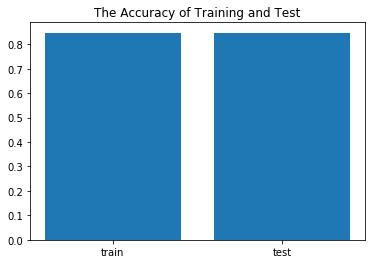

In [8]:
predictors = ["Credit_History"]
    
#Fit the model:
model.fit(dataset[predictors],dataset[outcome])

#Make predictions on training set:
predictions = model.predict(dataset[predictors])

#accuracy = 1-mean_squared_error(dataset[outcome], predictions)

accuracy_test = (1-mean_squared_error(dataset[outcome], predictions))

print("The Accuracy of the Test data is:",accuracy_test)


accuracy = [max(accuracy_train), accuracy_test]
data = ('train','test')

#Plot the bar chart showing number of Female and Male
plt.bar(np.arange(len(accuracy)), accuracy)
plt.title('The Accuracy of Training and Test')
plt.xticks(np.arange(len(accuracy)),data)
plt.savefig('accuracy_linear.jpg')
plt.show()